# 拟合线性回归
拟合的直线使svm的最大间距能够尽可能多地包含已知点，且认为已包含的已知点损失为0，损失函数可以表示为：

$$ max(0,|y_i-(\omega^Tx+b)|-\frac{r}{2}) $$

构造满足y=3x+5关系的若干个点，并加入噪音

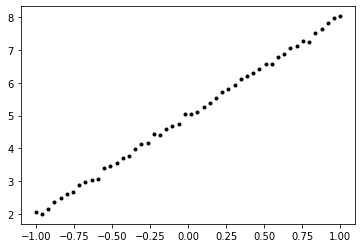

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# 生成x
t_x=np.linspace(-1,1,50,dtype=np.float32)
noise=np.random.normal(0,0.05,t_x.shape)
t_y=3.0*t_x+5.0+noise
plt.plot(t_x,t_y,'k.')
plt.show()



In [3]:
learning_rate=0.01
training_epochs=1000
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)
a=tf.Variable(0.0)
b=tf.Variable(0.0)
curr_y=x*a+b
epsilon=tf.constant([0.25])
#损失函数
loss=tf.reduce_sum(tf.maximum(0.,tf.subtract(tf.abs(tf.subtract(curr_y,y)),epsilon)))
optimizer=tf.train.GradientDescentOptimizer(learning_rate)
train=optimizer.minimize(loss)

W1112 14:42:36.653244  2760 deprecation.py:323] From D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


0 [0.0, 0.5, 212.19443]
20 [2.8363264, 4.979999, 0.010812521]
40 [2.85551, 4.979999, 0.0]
60 [2.85551, 4.979999, 0.0]
80 [2.85551, 4.979999, 0.0]
100 [2.85551, 4.979999, 0.0]
120 [2.85551, 4.979999, 0.0]
140 [2.85551, 4.979999, 0.0]
160 [2.85551, 4.979999, 0.0]
180 [2.85551, 4.979999, 0.0]
200 [2.85551, 4.979999, 0.0]
220 [2.85551, 4.979999, 0.0]
240 [2.85551, 4.979999, 0.0]
260 [2.85551, 4.979999, 0.0]
280 [2.85551, 4.979999, 0.0]
300 [2.85551, 4.979999, 0.0]
320 [2.85551, 4.979999, 0.0]
340 [2.85551, 4.979999, 0.0]
360 [2.85551, 4.979999, 0.0]
380 [2.85551, 4.979999, 0.0]
400 [2.85551, 4.979999, 0.0]
420 [2.85551, 4.979999, 0.0]
440 [2.85551, 4.979999, 0.0]
460 [2.85551, 4.979999, 0.0]
480 [2.85551, 4.979999, 0.0]
500 [2.85551, 4.979999, 0.0]
520 [2.85551, 4.979999, 0.0]
540 [2.85551, 4.979999, 0.0]
560 [2.85551, 4.979999, 0.0]
580 [2.85551, 4.979999, 0.0]
600 [2.85551, 4.979999, 0.0]
620 [2.85551, 4.979999, 0.0]
640 [2.85551, 4.979999, 0.0]
660 [2.85551, 4.979999, 0.0]
680 [2.85551,

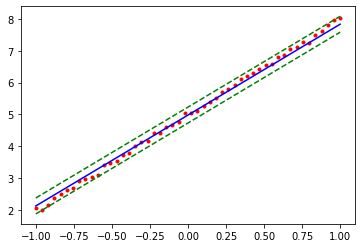

In [5]:
# 数据训练
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(training_epochs):
        sess.run(train,feed_dict={x:t_x,y:t_y})
        if i%20==0:
            print(i,sess.run([a,b,loss],feed_dict={x:t_x,y:t_y}))
    a_val=sess.run(a)
    b_val=sess.run(b)
    print("this model is y=",a_val,"*x+",b_val)
    y_learned=t_x*a_val+b_val
    plt.plot(t_x,t_y,'r.')
    plt.plot(t_x,y_learned,'b-')
    linewidth=sess.run(epsilon)
    plt.plot(t_x,y_learned+linewidth,'g--')
    plt.plot(t_x,y_learned-linewidth,'g--')
    plt.show()
    plt.close()
